In [74]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Dose in each cell

In [111]:
def low_energy(energy):
    return 2.5 + 18.2 * np.exp(- np.log(energy) ** 2 / 6)

def medium_energy(energy):
    return 5.0 + 17.0 * np.exp(- np.log(2 * energy) ** 2 / 6)

def high_energy(energy):
    return 2.5 + 3.25 * np.exp(- np.log(0.04 * energy) ** 2 / 6)

def quality(x):
    if x < 1:
        return low_energy(x)
    elif x <= 50:
        return medium_energy(x)
    else:
        return high_energy(x)

In [106]:
x = np.linspace(-2.5, 2.5, 6)
np.piecewise(x, [x < 0, x >= 0], [low_energy, medium_energy])

array([         nan,          nan,          nan,  22.        ,
        18.90231237,  16.03970455])

In [114]:
def total_dose(cellno):
    data = pd.read_csv('dose/cell{0}.dat'.format(cellno))
    
    data['quality'] = data['energy'].apply(quality)
    
    data['Dose rate (mrem/hr)'] = data['tally'] * 1e6 * 1e3 * 1.6e-19 * 6.43e8 * 3600 * 1e-2 * 1e3 * data['quality']
    data['Exposure rate (Gy/second)'] = data['tally'] * 1e6 * 1e3 * 1.6e-19 * 6.43e8
    data['Dose rate (Sv/second)'] = data['Exposure rate (Gy/second)'] * data['quality']
    print('Exposure (Gy/second) = {:02.3g}'.format(np.sum(data['Exposure rate (Gy/second)'])))
    print('Dose (mrem/hr) = {:02.3g}'.format(np.sum(data['Dose rate (mrem/hr)'])))
    print('Dose (Sv/second) = {:02.3g}'.format(np.sum(data['Dose rate (Sv/second)'])))

Cell A

In [115]:
total_dose(81)

Exposure (Gy/second) = 4.35e-08
Dose (mrem/hr) = 0.0231
Dose (Sv/second) = 6.43e-07


Cell B

In [116]:
total_dose(82)

Exposure (Gy/second) = 4.59e-08
Dose (mrem/hr) = 0.0244
Dose (Sv/second) = 6.79e-07


Cell C

In [117]:
total_dose(83)

Exposure (Gy/second) = 4.61e-08
Dose (mrem/hr) = 0.0245
Dose (Sv/second) = 6.82e-07


Cell D

In [118]:
total_dose(84)

Exposure (Gy/second) = 5.13e-08
Dose (mrem/hr) = 0.0275
Dose (Sv/second) = 7.64e-07


Cell E

In [119]:
total_dose(85)

Exposure (Gy/second) = 1.1e-07
Dose (mrem/hr) = 0.0606
Dose (Sv/second) = 1.68e-06


# Flux Spectrum Graphs

In [18]:
def flux_spectrum(cellno):
    data = pd.read_csv('spectrum/cell{0}.dat'.format(cellno))
    return data['energy'], data['tally'], data['variance']

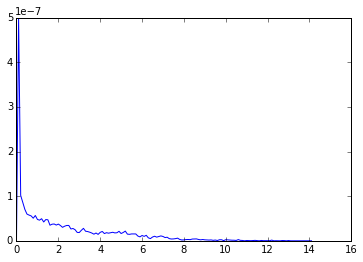

In [19]:
for i in range(81:86):
    plt.plot(flux_spectrum(81)[0], flux_spectrum(81)[1])
plt.show()